<a href="https://colab.research.google.com/github/NicoMontoya/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nico_Montoya_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [32]:
# TODO
import pandas as pd

# header names for the columns
headers = ['age', 'year_operated', 'axilary_codes_detected','survival_status']


## loading raw data into data frame
patient_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=headers)
patient_df.head(20)


,age,year_operated,axilary_codes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


After loading the data and visualizing the first 5 rows, you can see that it has the right number of observations (which is 4).  The columns do not have proper names though.  I will need to Add them into the data frame. Which I went back and did while loading the data.

In [33]:
## check data types
patient_df.dtypes

age                       int64
year_operated             int64
axilary_codes_detected    int64
survival_status           int64
dtype: object

All of the information are of type integers, which means I will be able to use all in an analysis.  For now, it seems I do not need to change the type of any of the columns.

In [34]:
## check to see if there are any null values
patient_df.isnull().sum()

age                       0
year_operated             0
axilary_codes_detected    0
survival_status           0
dtype: int64

Luckily there seems to be no null or missing values within the data set.  This is a pretty clean data set.

In [35]:
## one hot encode survival status column
patient_df['survival_status'].value_counts() ## make sure that there is no formatting difference in the numbers


1    225
2     81
Name: survival_status, dtype: int64

In [36]:
## I will choose to change the 1's to 0's and the 2's to 1's by a simple find and replace menthod
diction = {2:1, 1:0}

## make a copy of the DF so I know that I am working with one who's values are changed
patient_df_mod = patient_df

## replace the values with the cleanup values addressed above for the survival status column
patient_df_mod['survival_status'] = patient_df_mod.survival_status.map(diction)
patient_df_mod.head(20)

,age,year_operated,axilary_codes_detected,survival_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


Part 1 should be all done! 
1. The data is loaded
2. The correct number of observations are accounted for
3. There should be no missing values
4. Column names have been added according to the documentaion
5. The survival variable is encoded to 1's and 2's

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [37]:
## show the summary statistics for each of the observations
patient_df_mod.describe()

,age,year_operated,axilary_codes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
## crosstabs between survival status and year_operated
year_operated_bins = pd.cut(patient_df_mod['year_operated'], bins=5)
age_bins = pd.cut(patient_df_mod['age'], bins=2)
ct = pd.crosstab(patient_df_mod['survival_status'], year_operated_bins, normalize=True)

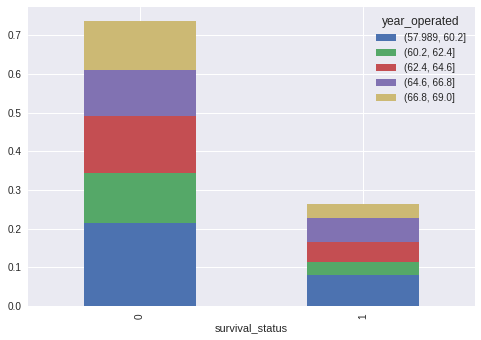

In [67]:
## plotting the crosstab in a stacked bar graph
ct.plot(kind='bar', stacked=True)

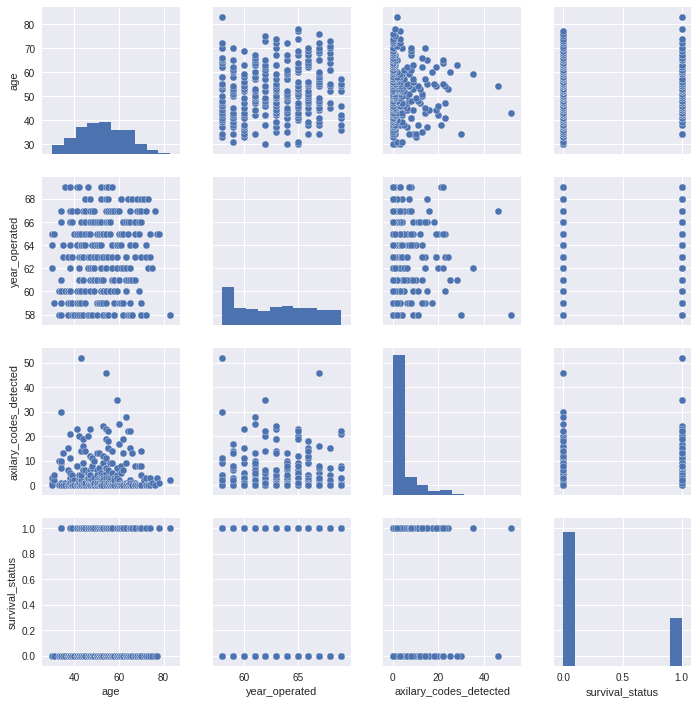

In [54]:
#seaborn pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(patient_df_mod)

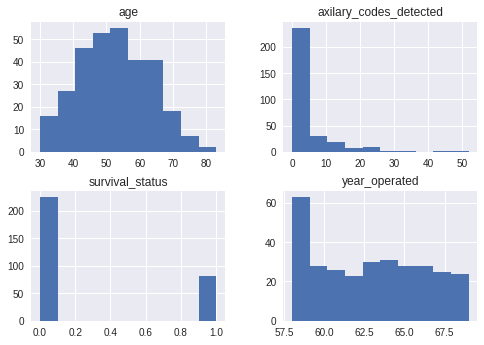

In [59]:
## histograms.. I realize it these are shown in the previous seaborn pairplot
# example.. but jsut demonstrating that one can call simple histograms as well
# with pandas
patient_df_mod.hist();


(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

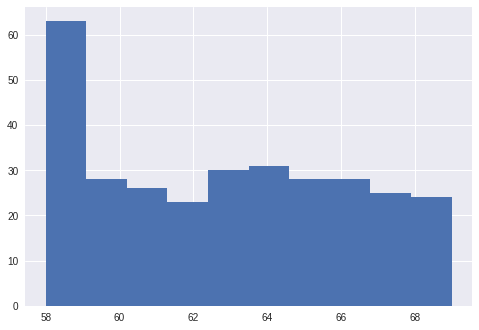

In [74]:
plt.hist(patient_df_mod['year_operated'])

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. One feature that I can see may have a positive relationship with survival is age.  It is most clearly featured in the scatter plot with survival in the x axis and age on the y axis.  But once examined, one can see that the cluster of people that sruvived longer than 5 years is lower than the cluster of people that died before 5 years.  Indicating that an older age has a positive correlation with dying in less than five years.

2. One feature that looks to have a negative relationship with survival is year operated.  This is best represented by the stacked bar graph I plotted above.  One can see that as the year operated are in the later years, less people seem to have died before 5 years.  I realized that it also could be the case that there are just less people in the sample for the later years.  That is why I checked that in the last histogram.  Which it is true, that for the first bin of years operated, there was significantly more people in the sample.  But after that, the sample number seems to be relatively the same.  The stacked bar graph still shows a slight decrease of people that died before 5 years in the latter years.


Text(0.5, 1.0, 'Year Operated vs Age')

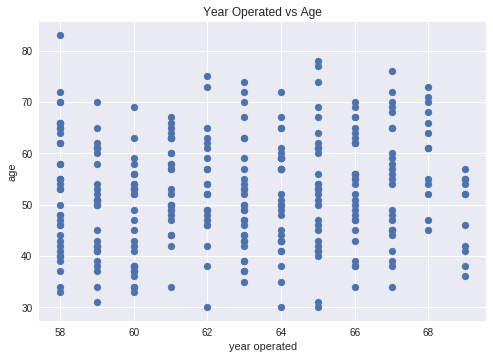

In [77]:
plt.scatter('year_operated', 'age', data=patient_df_mod)
plt.xlabel('year operated')
plt.ylabel('age')
plt.title('Year Operated vs Age')

3. At first glance there seems to be no correlation between year operated and the age.

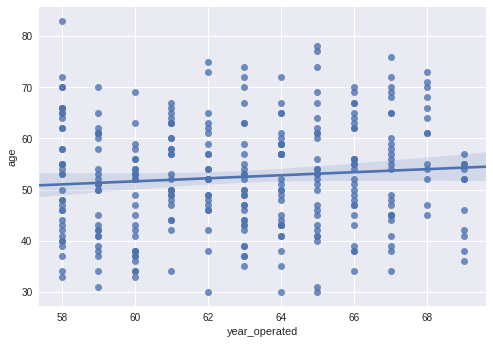

In [81]:
sns.regplot(x=patient_df_mod['year_operated'], y=patient_df_mod['age'])


With a little further investigation, if you plot a regression line into the data, one can see that there does seem to be a slight positive correlation between year operated and the age. Meaning that in the later years, more people of older age got operated on. Not entirely sure what significance that may have on the data.  If this correlation is significant though, it could be a reason that older people seem to have a higher risk of dying in less than 5 years (as spoken about earlier).  It may not be that they are more at risk, but simply there were just more people of an older age that were operated on.